In [194]:
import numpy as np
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report
import sklearn

### Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [195]:
# get titanic data
df = acquire.get_titanic_data()


In [196]:
# view first few rows
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [197]:
df1 = prepare.prep_titanic(df)

In [198]:
df1= df1.drop(columns = ['embarked', 'class',"passenger_id"])
df1

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,0,1
887,1,1,0,0,30.0000,1,0,0,1
888,0,3,1,2,23.4500,0,0,0,1
889,1,1,0,0,30.0000,1,1,0,0


In [199]:
titanic_train, titanic_validate, titanic_test = prepare.my_train_test_split(df1,"survived")
print(titanic_train.shape, titanic_validate.shape, titanic_test.shape)
print(titanic_train.describe().T)


(534, 9) (178, 9) (179, 9)
                         count       mean        std  min     25%   50%  \
survived                 534.0   0.383895   0.486789  0.0  0.0000   0.0   
pclass                   534.0   2.323970   0.822928  1.0  2.0000   3.0   
sibsp                    534.0   0.514981   1.143856  0.0  0.0000   0.0   
parch                    534.0   0.352060   0.759941  0.0  0.0000   0.0   
fare                     534.0  31.058106  46.866121  0.0  7.8958  13.5   
alone                    534.0   0.627341   0.483966  0.0  0.0000   1.0   
sex_male                 534.0   0.651685   0.476883  0.0  0.0000   1.0   
embark_town_Queenstown   534.0   0.086142   0.280837  0.0  0.0000   0.0   
embark_town_Southampton  534.0   0.713483   0.452558  0.0  0.0000   1.0   

                             75%       max  
survived                  1.0000    1.0000  
pclass                    3.0000    3.0000  
sibsp                     1.0000    8.0000  
parch                     0.0000    5.0000

In [200]:
titanic_train.describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.713483
std,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.452558
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [201]:
titanic_train.columns, titanic_validate.columns


(Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'),
 Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'))

In [202]:
# X is indepedent variables
# y is target variable

# x and y train
X_titanic_train = titanic_train.drop(columns = 'survived')
y_titanic_train = titanic_train.survived

# x and y validate
X_titanic_validate = titanic_validate.drop(columns = 'survived')
y_titanic_validate = titanic_validate.survived

# x and y test
X_titanic_test = titanic_test.drop(columns = 'survived')
y_titanic_test = titanic_test.survived

In [203]:
# y_train data
y_titanic_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [204]:
# create a baseline model
titanic_baseline = (y_titanic_train == 0).mean()
print('The survival baseline is:', titanic_baseline)

The survival baseline is: 0.6161048689138576


In [205]:
# baseline model is the mode of target varible that did not survive.
# baseline accuracy is the survival baseline of 61.61% 

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [212]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=1)
# fit the thing
model1.fit(X_titanic_train, y_titanic_train)
# use the thing
print(f'training score: {model1.score(X_titanic_train, y_titanic_train):.2%}')
print(f'validate score: {model1.score(X_titanic_validate, y_titanic_validate):.2%}')

training score: 79.21%
validate score: 77.53%


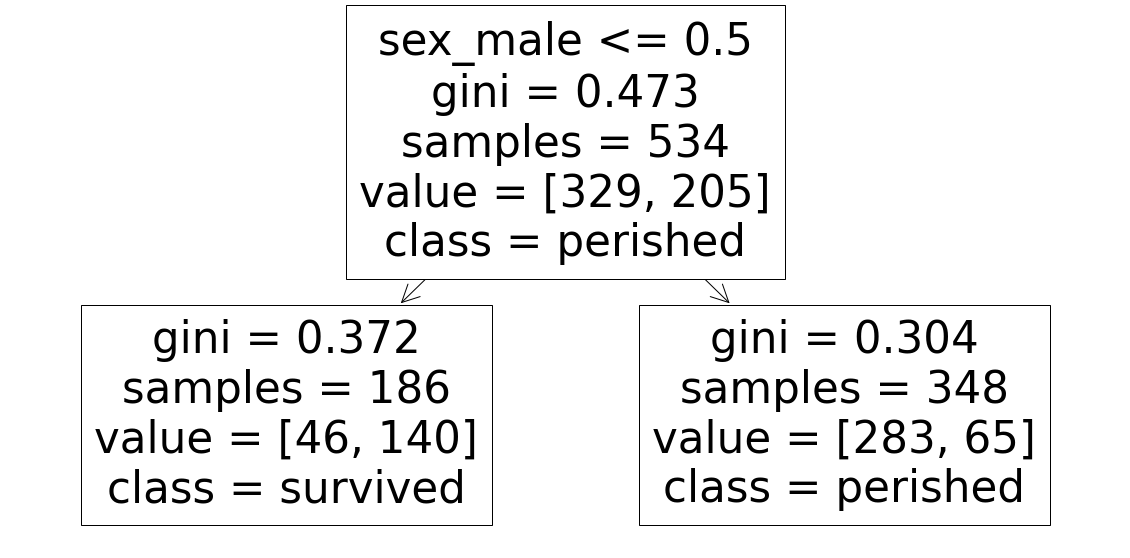

In [213]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model1, feature_names=X_titanic_train.columns.to_list(), class_names=['perished', 'survived']);

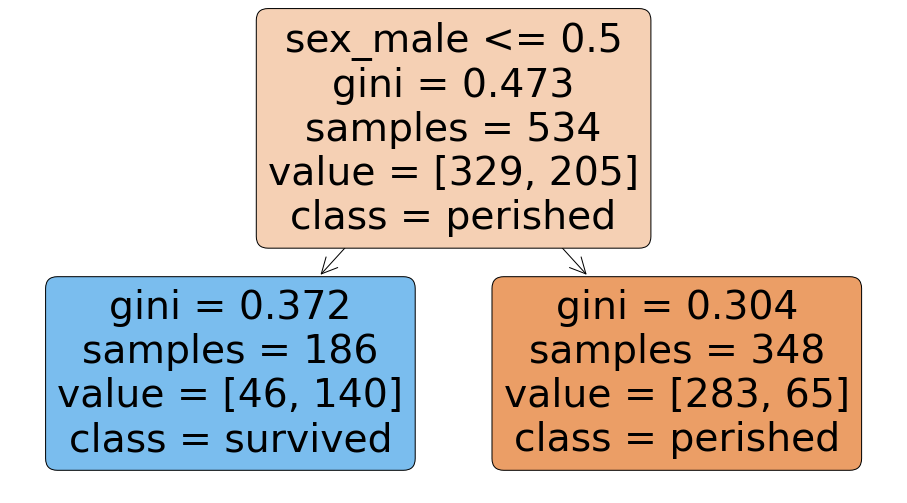

In [214]:
plt.figure(figsize=(16, 9))
plot_tree(
    # what thing:
          model1, 
    # what are the features called for the sake of the diagram?
          feature_names=X_titanic_train.columns.tolist(), 
    # what are the classes called for the sake of the diagram?
          class_names=['perished', 'survived'], 
    # fill the nodes with color!
          filled=True, 
    # round the corners
          rounded=True);
# note the opacity associates with the gini impurity!

In [215]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=1, random_state=123)


In [216]:
# model1.fit(X, y)

clf = clf.fit(X_titanic_train, y_titanic_train)


In [217]:
# make prediction on train obeservations

y_titanic_pred = clf.predict(X_titanic_train)
y_titanic_pred[0:5]


array([0, 1, 0, 0, 0])

In [218]:
print(classification_report(y_titanic_train, y_titanic_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [219]:
#model1 score
model1.score(X_titanic_validate,y_titanic_validate)

0.7752808988764045

In [220]:
#classification report
print(classification_report(y_titanic_train, y_titanic_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [221]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_titanic_train, y_titanic_pred)


array([[283,  46],
       [ 65, 140]])

In [222]:
y_titanic_train.value_counts()


0    329
1    205
Name: survived, dtype: int64

In [223]:
import pandas as pd

labels = sorted(y_titanic_train.unique())

df1_confused = pd.DataFrame(sklearn.metrics.confusion_matrix(y_titanic_train, y_titanic_pred), index=labels, columns=labels)
df1_confused


,0,1
0,283,46
1,65,140


### 5.Run through steps 2-4 using a different max_depth value.



In [224]:
#model2
# make the thing
model2 = DecisionTreeClassifier(max_depth=3)
# fit the thing
model2.fit(X_titanic_train, y_titanic_train)
# use the thing
print(f'training score: {model2.score(X_titanic_train, y_titanic_train):.2%}')
print(f'validate score: {model2.score(X_titanic_validate, y_titanic_validate):.2%}')

training score: 81.84%
validate score: 79.21%


In [239]:
# model2.fit(X, y)

clf = clf.fit(X_titanic_train, y_titanic_train)


In [226]:
# make prediction on train obeservations

y_titanic_pred = clf.predict(X_titanic_train)
y_titanic_pred[0:5]


array([0, 1, 0, 0, 0])

In [229]:
print(classification_report(y_titanic_train, y_titanic_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



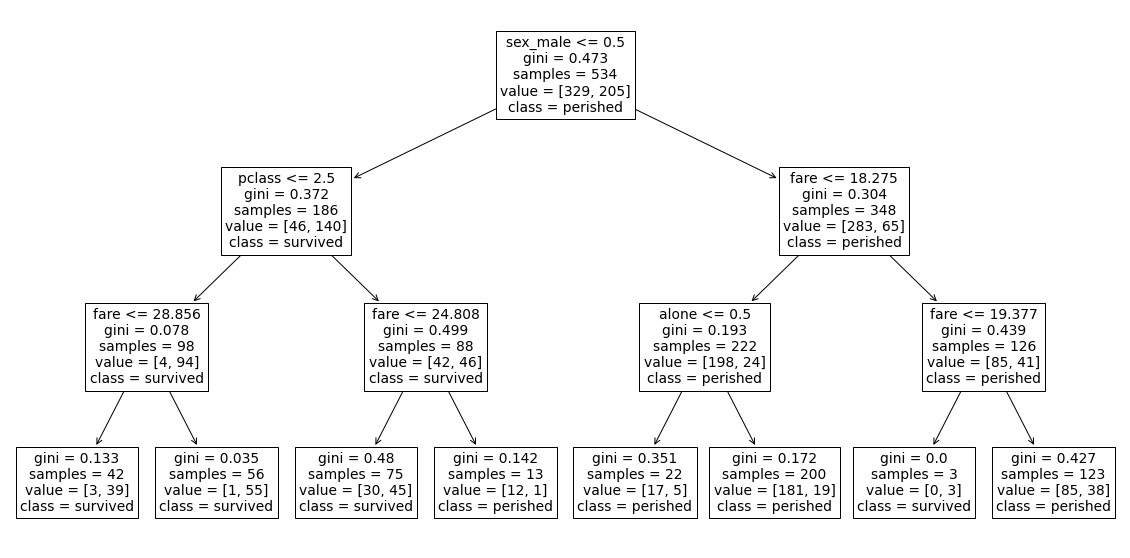

In [230]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model2, feature_names=X_titanic_train.columns.to_list(), class_names=['perished', 'survived']);

In [231]:
# model2.fit(X, y)

clf = clf.fit(X_titanic_train, y_titanic_train)


In [232]:
# make prediction on train obeservations

y_titanic_pred = clf.predict(X_titanic_train)
y_titanic_pred[0:5]


array([0, 1, 0, 0, 0])

In [233]:
#classification report
print(classification_report(y_titanic_train, y_titanic_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



In [237]:
#model2 score
model2.score(X_titanic_validate,y_titanic_validate)

0.7921348314606742

In [235]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_titanic_train, y_titanic_pred)


array([[283,  46],
       [ 65, 140]])

In [236]:
y_titanic_train.value_counts()


0    329
1    205
Name: survived, dtype: int64

### 6. Which model performs better on your in-sample data?

In [183]:
# make a new column in y_preds
y_titanic_pred = clf.predict(X_titanic_train)
clf.score(X_titanic_train, y_titanic_train)

0.8183520599250936

In [187]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_titanic_train, y_titanic_train)
    models.append(model)
    model_scores.append(model.score(X_titanic_train, y_titanic_train))

In [188]:
len(models)

6

In [ ]:
# depth 1 and depth 3 accuracy,  is the same at 79%
- 

## TELCO DATASET 

### Exercise continuation

### 1. Work through these same exercises using the Telco dataset.
### 2. Experiment with this model on other datasets with a higher number of output classes.

In [ ]:
##### incomplete#######

### RANDOM FOREST

### Exercises
### Continue working in your model file with titanic data to do the following:



### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [248]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [258]:
# get titanic data
df = acquire.get_titanic_data()
df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [259]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test


In [261]:
titanic_train.describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.713483
std,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.452558
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [262]:
titanic_train.columns, titanic_validate.columns


(Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'),
 Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'))

In [265]:
# X is indepedent variables
# y is target variable

# x and y train
X_titanic_train = titanic_train.drop(columns = 'survived')
y_titanic_train = titanic_train.survived

# x and y validate
X_titanic_validate = titanic_validate.drop(columns = 'survived')
y_titanic_validate = titanic_validate.survived

# x and y test
X_titanic_test = titanic_test.drop(columns = 'survived')
y_titanic_test = titanic_test.survived

In [266]:
# y_train data
y_titanic_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [ ]:
# Explore

In [276]:
#create an object
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
rf.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(max_depth=10)

In [272]:
#fit the model
rf.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [274]:
#predict
rf.predict(X_titanic_train)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [316]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_titanic_train, y_titanic_train)))

Accuracy of random forest classifier on training set: 0.94


In [317]:
#create a confusion matrix
cm = confusion_matrix(y_titanic_train, y_titanic_pred)
print(cm)

[[283  46]
 [ 65 140]]


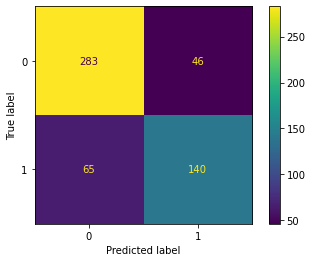

In [318]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [319]:
# create a classification report

In [320]:
rf.score(X_titanic_train, y_titanic_train)

0.9438202247191011

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [324]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_titanic_train,y_titanic_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(140, 283, 46, 65)

In [326]:
print(classification_report(y_titanic_train, rf.predict(X_titanic_train)))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       329
           1       0.98      0.87      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



In [327]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7921348314606742
True Positive Rate: 0.6829268292682927
False Positive Rate: 0.1398176291793313
True Negative Rate: 0.8601823708206687
False Negative Rate: 0.3170731707317073
Precision: 0.7526881720430108
Recall: 0.6829268292682927
F1 Score: 0.7161125319693095
Support (0): 205
Support (1): 329


In [ ]:
#Accuracy: 79%
#True Positive Rate: 68%
#False Positive Rate: 13% 
#True Negative Rate: 86% 
#False Negative Rate: 31% 
#Support: 534

### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [289]:
models = [rf]
start = 2
stop = 10

for i in range(start, stop):
    clf = RandomForestClassifier(min_samples_leaf = i, max_depth = stop - i)
    clf.fit(X_titanic_train, y_titanic_train)
    print(classification_report(y_titanic_train, clf.predict(X_titanic_train)))
    
    models.append(clf)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       329
           1       0.94      0.75      0.84       205

    accuracy                           0.89       534
   macro avg       0.90      0.86      0.88       534
weighted avg       0.89      0.89      0.88       534

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       329
           1       0.92      0.74      0.82       205

    accuracy                           0.87       534
   macro avg       0.89      0.85      0.86       534
weighted avg       0.88      0.87      0.87       534

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       329
           1       0.91      0.70      0.79       205

    accuracy                           0.86       534
   macro avg       0.87      0.83      0.84       534
weighted avg       0.86      0.86      0.85       534

              preci

In [292]:
models = [rf]
start = 2
stop = 10

for i in range(start, stop):
    clf = RandomForestClassifier(max_depth = i, random_state = 123)
    clf.fit(X_titanic_train, y_titanic_train)
    print(classification_report(y_titanic_train, clf.predict(X_titanic_train)))
    
    models.append(clf)

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       329
           1       0.90      0.52      0.66       205

    accuracy                           0.79       534
   macro avg       0.83      0.74      0.76       534
weighted avg       0.82      0.79      0.78       534

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       329
           1       0.85      0.66      0.74       205

    accuracy                           0.82       534
   macro avg       0.83      0.79      0.80       534
weighted avg       0.83      0.82      0.82       534

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       329
           1       0.89      0.68      0.77       205

    accuracy                           0.85       534
   macro avg       0.86      0.82      0.83       534
weighted avg       0.85      0.85      0.84       534

              preci

In [308]:
# compare in-sample to out-of-sample
metrics = []

for i in range(2, 20):
    # Make the thing
    rf = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the thing
    rf = rf.fit(X_titanic_train, y_titanic_train)

    # Use the thing
    in_sample_accuracy = rf.score(X_titanic_train, y_titanic_train)
    
    out_of_sample_accuracy = rf.score(X_titanic_validate, y_titanic_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.794007,0.786517,0.007491
1,3,0.823970,0.803371,0.020599
2,4,0.846442,0.803371,0.043071
3,5,0.859551,0.797753,0.061798
4,6,0.880150,0.786517,0.093633
5,7,0.902622,0.792135,0.110487
6,8,0.932584,0.775281,0.157303
7,9,0.940075,0.775281,0.164794
8,10,0.943820,0.758427,0.185393
9,11,0.943820,0.764045,0.179775


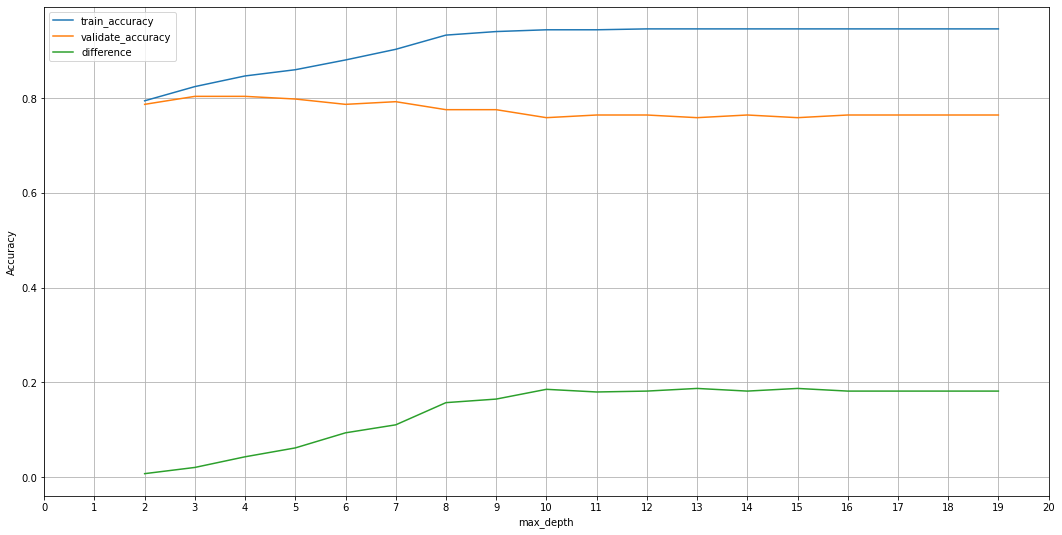

In [306]:
#plot different accuracies and differences
df.set_index('max_depth').plot(figsize = (18,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [313]:
# Increasing min_samples_per_leaf, decreasing max_depth
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the thing
    depth = max_depth - i
    n_samples = i
    rf = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the thing
    rf = rf.fit(X_titanic_train, y_titanic_train)

    # Use the thing
    in_sample_accuracy = rf.score(X_titanic_train, y_titanic_train)
    
    out_of_sample_accuracy = rf.score(X_titanic_validate, y_titanic_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.895131,0.786517,0.108614
1,3,17,0.880150,0.786517,0.093633
2,4,16,0.865169,0.803371,0.061798
3,5,15,0.846442,0.803371,0.043071
4,6,14,0.842697,0.808989,0.033708
5,7,13,0.840824,0.786517,0.054307
6,8,12,0.837079,0.792135,0.044944
7,9,11,0.833333,0.803371,0.029963
8,10,10,0.833333,0.808989,0.024345
9,11,9,0.823970,0.803371,0.020599


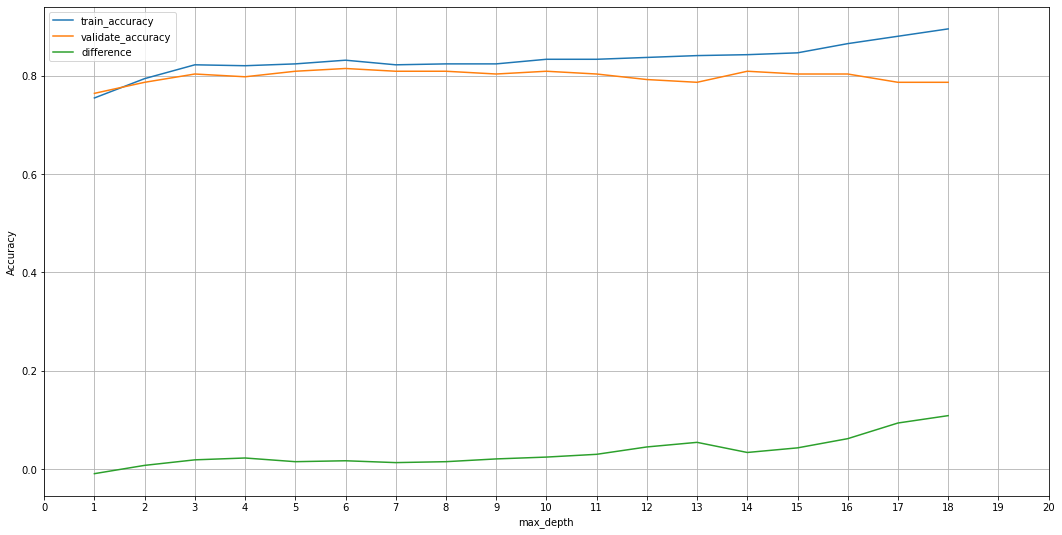

In [314]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (18,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
# there's differences in evaluation as seen above because we increased sample sizes and depth